## Python Data Visualization Exercise: Using seaborn to quickly make scientific plots from tabular data

In many cases, you will find the need to interpret and present tabular results. Often this requires some way to visualize potential patterns in the data. A great library to do this is `seaborn` because:
1) it has access to excellent colormaps which mimick the role of RColorBrewer in R, and has functions to plot the color palette. You can also customize with respect to e.g. saturation 
2) we can plot some complex plots that would require extra computation, panelling and layout in `matplotlib` to achieve

**Note:** I do want to emphasize, getting things especially fonts to look exactly right programmatically is not necessary and you don't need to panel either because we can save any plots to vector graphics and compose/change any element using external programs e.g. Adobe illustrator, Affinity Designer.

For these exercises, we will just use the standard datasets available in `seaborn`, as they give us a bit more to play with. 

Alternatively, feel free to use your own data or pick one from [Kaggle](https://www.kaggle.com/datasets) ! 


Make sure `seaborn` is installed. Use `pip install seaborn`

### Exercise 1: Execute the example in https://seaborn.pydata.org/examples/scatterplot_matrix.html. 
This will load a dataset 'penguins', and plot every variable pairwise with each other, colored by penguin species

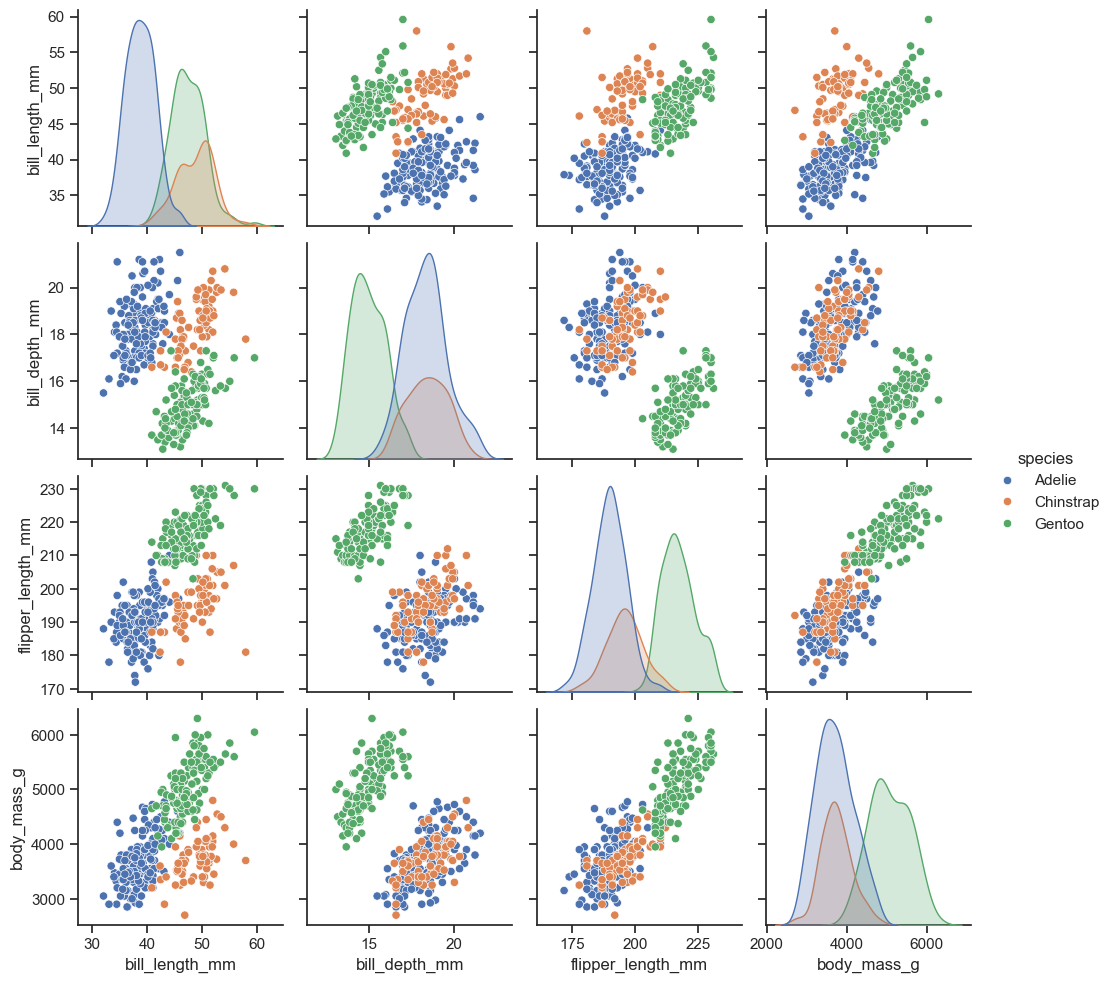

In [78]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

#### Exercise 2: print the loaded table, what other feature are there?, perform the same plot but using a diferent parameter for `hue`

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

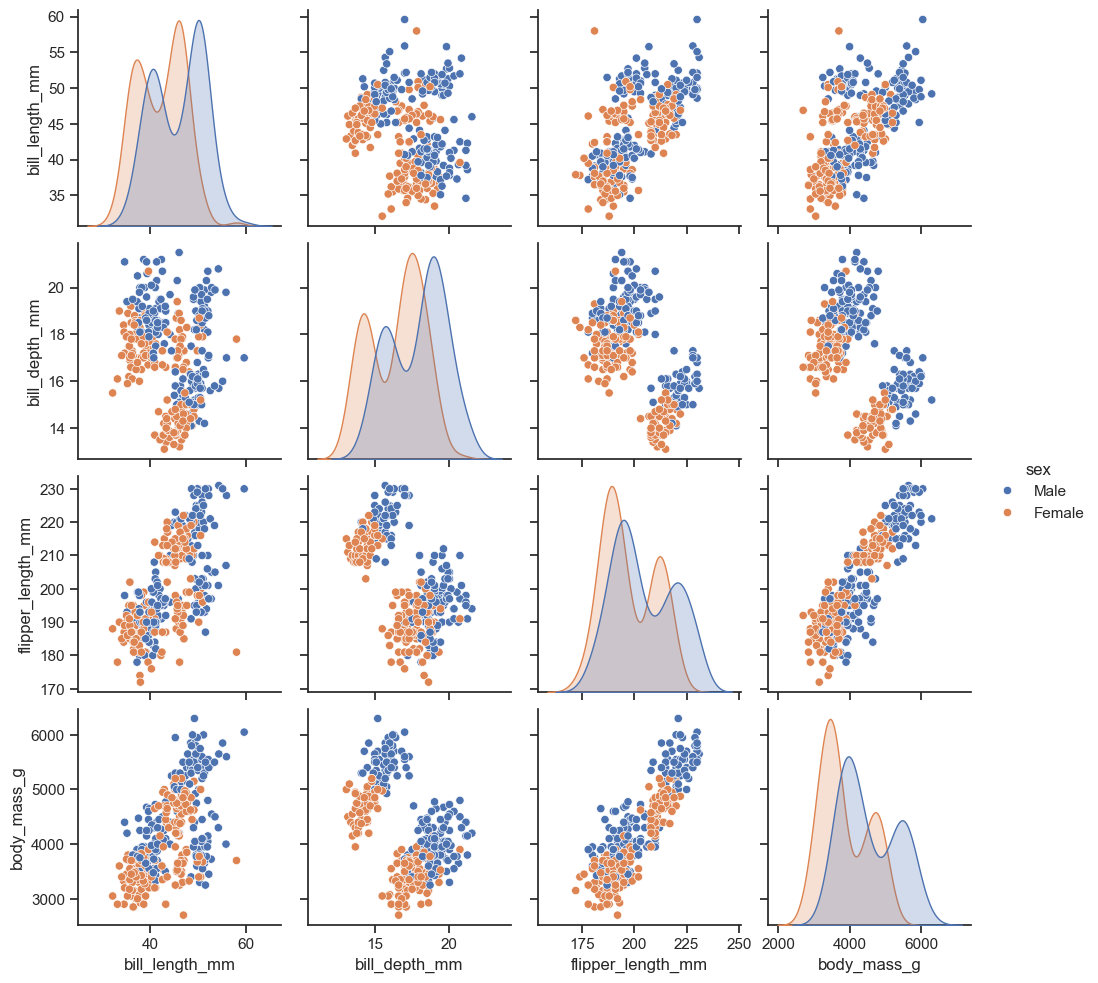

In [79]:
print(df)
print(df.columns)

sns.pairplot(df, hue="sex")

#### Exercise 3: Read the documentation API for `sns.pairplot` (https://seaborn.pydata.org/generated/seaborn.pairplot.html), scroll down to see how setting other parameters allows further customization of what is being plotted (No coding necessary)

#### Exercise 4: From the documentation can you figure out what parameters change the plot size? replot the figure to be smaller on screen

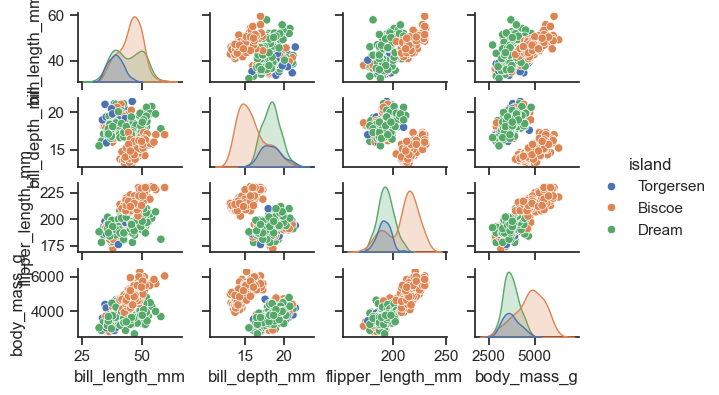

In [80]:
import pylab as plt 

sns.pairplot(df, hue='island', height=1, aspect=1.5)

#### Exercise 5: A seaborn plot is a `figure` object. Assign the command to a variable. How would you find what is this thing? Can you figure out how to save the plot?

Help on PairGrid in module seaborn.axisgrid object:

class PairGrid(Grid)
 |  PairGrid(data, *, hue=None, vars=None, x_vars=None, y_vars=None, hue_order=None, palette=None, hue_kws=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False)
 |  
 |  Subplot grid for plotting pairwise relationships in a dataset.
 |  
 |  This object maps each variable in a dataset onto a column and row in a
 |  grid of multiple axes. Different axes-level plotting functions can be
 |  used to draw bivariate plots in the upper and lower triangles, and the
 |  marginal distribution of each variable can be shown on the diagonal.
 |  
 |  Several different common plots can be generated in a single line using
 |  :func:`pairplot`. Use :class:`PairGrid` when you need more flexibility.
 |  
 |  See the :ref:`tutorial <grid_tutorial>` for more information.
 |  
 |  Method resolution order:
 |      PairGrid
 |      Grid
 |      _BaseGrid
 |      builtins.object
 |  
 | 

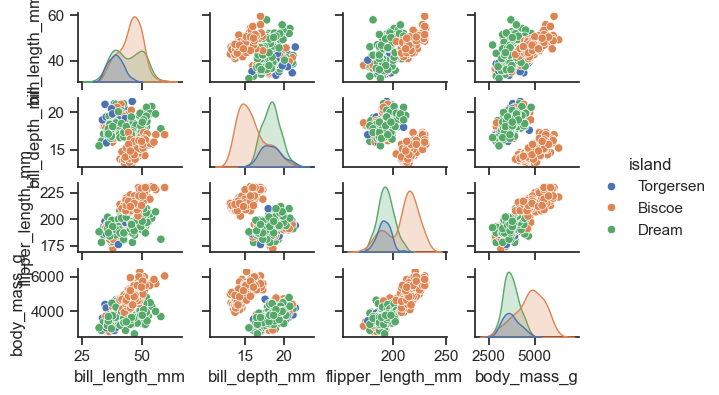

In [81]:
fig = sns.pairplot(df, hue='island', height=1, aspect=1.5)

help(fig) # list what this thing is about. 
fig.savefig('my_pair_plot.svg', dpi=300, bbox_inches='tight')

#### Extension Exercise: Suppose we wanted to analyze the similarity between the different penguins by their physical attributes, and overlay metadata to discovery patterns One way to do this is to compute the pairwise correlation and perform hierarchical clustering. 

Read through https://seaborn.pydata.org/examples/structured_heatmap.html. Can you figure out how to modify the code to do this for the penguins dataset?


C:\Users\s205272\AppData\Local\miniconda3\envs\u_Segment3D_env\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\s205272\AppData\Local\miniconda3\envs\u_Segment3D_env\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


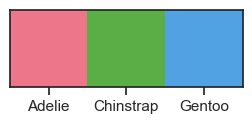

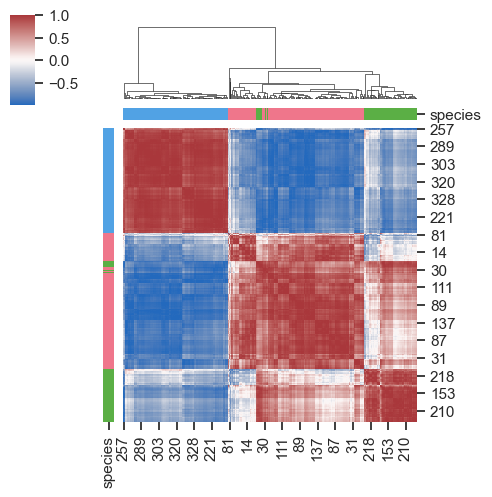

In [107]:
import numpy as np
import pylab as plt

df = df.dropna() # only have entries that don't have nan, otherwise cause issue in the correlation.

species = df['species']; n_species = len(np.unique(species))

# Create a categorical palette to identify the penguin species
species_pal = sns.husl_palette(n_species, s=.8)
species_lut = dict(zip(map(str, np.unique(species)), species_pal))

# visualize this palette, and annotate the plot
sns.palplot(species_pal)
plt.xticks(np.arange(n_species), np.unique(species))

# Convert the palette to vectors that will be drawn on the side of the matrix
species_colors = species.map(species_lut)


# subset for only the numerical attributes of penguins
df_numerical = df.loc[:,'bill_length_mm':'body_mass_g']
df_numerical = df_numerical.transpose()

# standard scaling each of the physical attributes is very important for comparison (you can try commenting this out to see the effect)
from sklearn.preprocessing import StandardScaler
import pandas as pd 
df_numerical = pd.DataFrame(StandardScaler().fit_transform(df_numerical.values.T).T, 
                            columns=df_numerical.columns, 
                            index=df_numerical.index)

# Draw the full plot
g = sns.clustermap(df_numerical.corr(),
                   cmap="vlag",
                   row_colors=species_colors,
                   col_colors=species_colors,
                   figsize=(5,5))

g.ax_row_dendrogram.remove()

**Note:** `g` contains ALL the information about the seaborn plot, which you can now interrogate to get information on the intermediate computations or custom set and adjust appearance. 

e.g. we can find the ordering of the original data the hierarchical clustering has generated by interrogating the
attribute `g.dendrogram_col`.

In [115]:
# we can for example find how the dendrogam has reorded the index elements and apply this to our table index.
hcluster_reorderd_ind = g.dendrogram_col.reordered_ind
penguin_reordered_id = df.index[hcluster_reorderd_ind]

print(penguin_reordered_id) # check the first element does match the first in the figure.

Index([257, 299, 253, 318, 327, 300, 222, 321, 263, 248,
       ...
       179, 154, 156, 186, 194, 193, 162, 181, 180, 188],
      dtype='int64', length=333)


In [119]:
# we can further find out what linkage and metric was used to compute the dendrogram (note, you can modify this in the sns.clustermap function too)

print('dendrogram linkage: ', g.dendrogram_col.method)
print('dendrogram metric: ', g.dendrogram_col.metric)

dendrogram linkage:  average
dendrogram metric:  euclidean
